In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
import numpy as np
from os import path, getcwd, chdir
import matplotlib.pyplot as plt
from tensorflow import keras
path = f"{getcwd()}/../tmp2/mnist.npz"

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
      if(logs.get('loss')<0.3):
        print("\nReached 99% accuracy so cancelling training!")
        self.model.stop_training = True
      
   

In [ ]:
callbacks=myCallback()
mnist = keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()



11493376/11490434 [==============================] - 0s 0us/step


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  61   3  42 118 193 118 118
   61   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  14 179 245 236 242 254 254 254 254
  245 235  84   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 151 254 254 254 213 192 178 178 180
  254 254 241  46   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  43 235 254 226  64  28  12   0   0   2
  128 252 255 173  17   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  56 254 253 107   0   0   0   

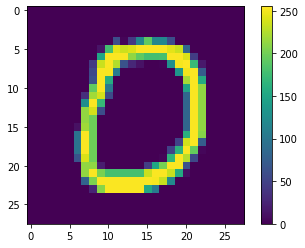

In [ ]:
plt.imshow(x_test[10])
plt.colorbar()
print(x_test[10])
print(y_test[10])

In [ ]:
x_train= x_train/255.0
x_test=x_test/255.0


In [ ]:
model = keras.Sequential([keras.layers.Flatten(),
keras.layers.Dense(128, activation=tf.nn.relu),
keras.layers.Dense(64, activation=tf.nn.relu),
keras.layers.Dense(10, activation=tf.nn.softmax)]
 
 )

In [ ]:
model.compile(optimizer='adam', loss= 'sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples
Epoch 1/10
59872/60000 [============================>.] - ETA: 0s - loss: 0.2431 - acc: 0.9289
Reached 99% accuracy so cancelling training!
60000/60000 [==============================] - 5s 77us/sample - loss: 0.2429 - acc: 0.9290


In [ ]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 0s 30us/sample - loss: 0.1204 - acc: 0.9604


[0.12042287539839745, 0.9604]

In [ ]:
classifications =  model.predict(x_test)
print(classifications[10])
print(y_test[10])

[9.97696817e-01 2.26992433e-05 9.79653560e-04 7.17816329e-06
 1.48940117e-05 6.94687551e-05 1.21109115e-04 8.06214848e-06
 4.91164101e-04 5.89002739e-04]
0
